# Segmenting platynereis dumerilii

In this demo, we will explore a dataset of the marine annelid Platynereis dumerilii from [Ozpolat, B. et al](https://zenodo.org/records/1063531) licensed by [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode). 

In [2]:
import os
import openai
from bia_bob import bob

In [4]:
%bob Load the platynereis_dumerilii.tif and show it

I will load the image `platynereis_dumerilii.tif` and display it.



StackViewNDArray([[[0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.]],

                  [[0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.]],

                  [[0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.]],

                  ...,

                  [[0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.]],

                  [[0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.]],

                  [[0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.],
                   [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
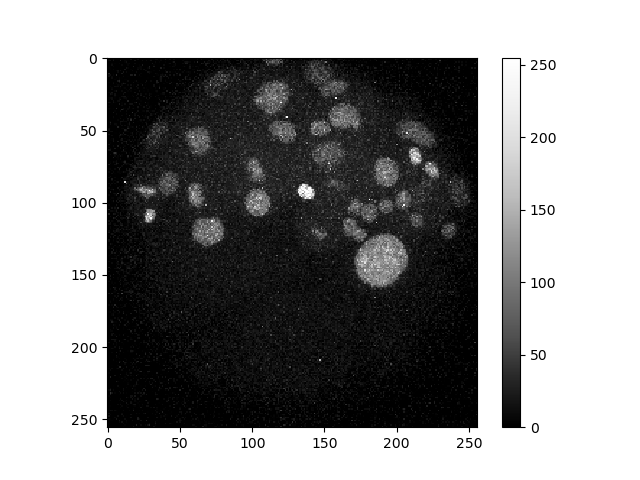
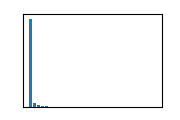

In [5]:
from skimage.io import imread
import stackview

# Load the image
image = imread('platynereis_dumerilii.tif')

# Display the image
stackview.insight(image)

In [11]:
%bob Segment the image by using Voronoi-Otsu-Labeling.

I will segment the image using the Voronoi-Otsu-Labeling method. This involves applying Gaussian blur, thresholding with Otsu's method, computing distance transform, and then applying the watershed algorithm for segmentation.



StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=int32)
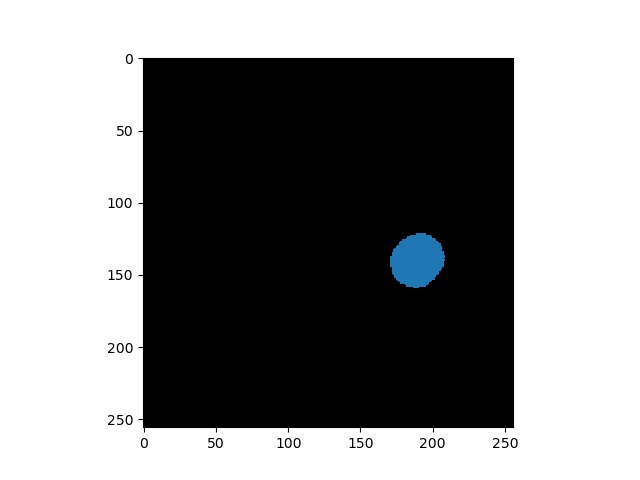

In [30]:
import numpy as np
from skimage.io import imread
from skimage.filters import gaussian, threshold_otsu
from skimage.measure import label
from skimage.segmentation import watershed
from scipy.ndimage import distance_transform_edt
import stackview

# Load the image
image = imread('platynereis_dumerilii.tif')

# Apply Gaussian blur
blurred = gaussian(image, sigma=1)

# Apply Otsu's thresholding
thresh_val = threshold_otsu(blurred)
binary = blurred > thresh_val

# Compute distance transform
distance = distance_transform_edt(binary)

# Apply watershed for Voronoi-Otsu labeling
local_maxi = label(distance == np.max(distance))
labels = watershed(-distance, local_maxi, mask=binary)

# Display the segmented result
stackview.insight(labels)

In [19]:
%%bob 
Segment the image by using Voronoi-Otsu-Labeling. 
Please also take objects with lower intensity values into account as one object is much brighter than the rest.

UsageError: %%bob is a cell magic, but the cell body is empty. Did you mean the line magic %bob (single %)?


/var/folders/9w/2fk0gqyd2txgyc0ttrl89qt40000gn/T/ipykernel_5329/576092341.py:29: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, labels=binary)


StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=int32)
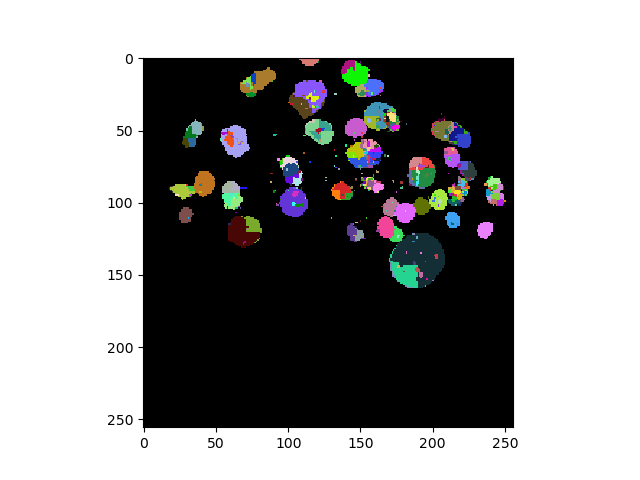

In [29]:
import numpy as np
from skimage.io import imread
from skimage.filters import gaussian
from skimage.measure import label
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import distance_transform_edt
import stackview
from skimage.exposure import rescale_intensity

# Load the image
image = imread('platynereis_dumerilii.tif')

# Rescale intensity to take lower intensity values into account
rescaled_image = rescale_intensity(image, in_range=(np.percentile(image, 1), np.percentile(image, 99)))

# Apply Gaussian blur
blurred = gaussian(rescaled_image, sigma=1)

# Compute Otsu's threshold on the blurred image
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(blurred)
binary = blurred > thresh_val

# Compute distance transform
distance = distance_transform_edt(binary)

# Detect local maxima
local_maxi = peak_local_max(distance, indices=False, labels=binary)

# Perform watershed segmentation
markers = label(local_maxi)
labels = watershed(-distance, markers, mask=binary)

# Display the segmented result
stackview.insight(labels)

In [17]:
%%bob 
Segment the image by using Voronoi-Otsu-Labeling. 
Please also take objects with lower intensity values into account as one object is much brighter than the rest. 
Please avoid oversegmentation.

I will segment the image using the Voronoi-Otsu-Labeling method, ensuring objects with lower intensity values are taken into account and oversegmentation is avoided.



/var/folders/9w/2fk0gqyd2txgyc0ttrl89qt40000gn/T/ipykernel_5329/872881912.py:29: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, labels=binary, min_distance=10)


StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=int32)
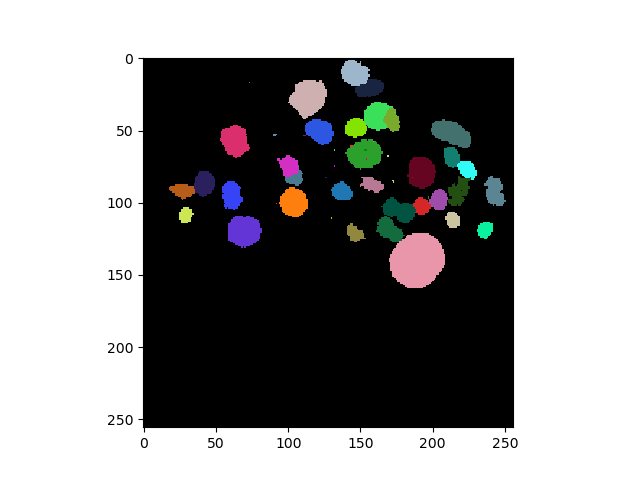

In [28]:
import numpy as np
from skimage.io import imread
from skimage.filters import gaussian
from skimage.measure import label
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import distance_transform_edt
import stackview
from skimage.exposure import rescale_intensity

# Load the image
image = imread('platynereis_dumerilii.tif')

# Rescale intensity to take lower intensity values into account
rescaled_image = rescale_intensity(image, in_range=(np.percentile(image, 1), np.percentile(image, 99)))

# Apply Gaussian blur
blurred = gaussian(rescaled_image, sigma=1)

# Compute Otsu's threshold on the blurred image
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(blurred)
binary = blurred > thresh_val

# Compute distance transform
distance = distance_transform_edt(binary)

# Detect local maxima, adjust the `min_distance` parameter to avoid oversegmentation
local_maxi = peak_local_max(distance, indices=False, labels=binary, min_distance=10)

# Perform watershed segmentation
markers = label(local_maxi)
labels = watershed(-distance, markers, mask=binary)

# Display the segmented result
stackview.insight(labels)